# Assignment
## Latency Tests Online Gaming Active Measurements
### Sorting Latency (Cur. Interactivity Score) and Coverage (SS-SINR) for 5G by DateTime for each campaign


In [762]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping
pd.set_option('future.no_silent_downcasting', True)

# reading CSV file
latency_5g = pd.read_csv('Data/Latency_Tests-Online_Gaming-Active_Measurements.csv', low_memory=False)
print(f'\nHeaders: {list(latency_5g.columns)}') # output headers


Headers: ['Date', 'Time', 'GPS Long', 'GPS Lat', '5G  PCI', 'LTE PCI', 'SS-RSRP', 'SS-RSRQ', 'SS-SINR', 'RSRP', 'RSRQ', 'SINR', 'RAT Info', '5G PDSCH Throughput', 'LTE PDSCH Throughput', '5G  PUSCH Throughput', 'LTE PUSCH Throughput', '5G  PDSCH QPSK Rate', '5G  PDSCH 16QAM Rate', '5G  PDSCH 64QAM Rate', '5G  PDSCH 256QAM Rate', 'LTE PDSCH QPSK Rate', 'LTE PDSCH 16QAM Rate', 'LTE PDSCH 64QAM Rate', 'LTE PDSCH 256QAM Rate', '5G  PUSCH QPSK Rate', '5G  PUSCH 16QAM Rate', '5G  PUSCH 64QAM Rate', '5G  PUSCH 256QAM Rate', 'LTE PUSCH QPSK Rate', 'LTE PUSCH 16QAM Rate', 'LTE PUSCH 64QAM Rate', '5G Min PDSCH MCS', '5G Avg PDSCH MCS', '5G Max PDSCH MCS', 'LTE DL MCS Level', '5G Min PUSCH MCS', '5G Avg PUSCH MCS', '5G Max PUSCH MCS', 'LTE UL MCS Level', '5G Serving SSB Index', '5G # Beams', '5G Min Num PDSCH RB', '5G Avg Num PDSCH RB', '5G Max Num PDSCH RB', 'LTE PDSCH RB Min', 'LTE PDSCH RB Max', 'LTE PDSCH RB Average', '5G Min Num PUSCH RB', '5G Avg Num PUSCH RB', '5G Max Num PUSCH RB', 'LTE 

In [763]:
def process_campaign_data(latency_5g, campaign_name):
    # filter data by campaign - each campaign uses only one operator
    all_campaign_data = latency_5g[latency_5g['Campaign'] == campaign_name].copy() # you can change campaign, some campaigns might be same in the passive dataset
    
    # check date time format
    #print(all_campaign_data[['Date', 'Time']].head())
    
    # convert time and date
    all_campaign_data.loc[:,'DateTime'] = pd.to_datetime(
        all_campaign_data['Date'] + ' ' + all_campaign_data['Time'], 
        format='%d.%m.%Y %H:%M:%S.%f',
        errors='coerce'
    )
    
    # select only the columns of interest and DateTime - You can add more columns
    columns_of_interest = ['DateTime', 'SS-SINR', 'RAT Info', 'Cur. Interactivity Score', 'Scenario', 'Operator', 'Campaign']
    
    campaign_data = all_campaign_data[columns_of_interest]
    
    # sort data by datetime
    campaign_data_sorted = campaign_data.sort_values(by='DateTime')
    
    # replace ? with NaN to mark missing values (really just duplicates)
    campaign_data_sorted.replace('?', np.nan, inplace=True)
    
    # ensure DataFrame retains correct object types
    campaign_data_sorted = campaign_data_sorted.infer_objects(copy=False)
    
    # Convert relevant columns to numeric, forcing errors to NaN
    campaign_data_sorted['SS-SINR'] = pd.to_numeric(campaign_data_sorted['SS-SINR'], errors='coerce')
    campaign_data_sorted['Cur. Interactivity Score'] = pd.to_numeric(campaign_data_sorted['Cur. Interactivity Score'], errors='coerce')
    
    # forward fill to replace NaN with value from the previous row
    campaign_data_sorted.ffill(inplace=True)
    
    # we only want indoor static and 5G
    campaign_data_sorted = campaign_data_sorted[(campaign_data_sorted['Scenario'] == 'IS') & (campaign_data_sorted['RAT Info'].str.contains('5G'))]

    # drop inaccurate data
    campaign_data_sorted = campaign_data_sorted[campaign_data_sorted['Cur. Interactivity Score'] != 0.0]
    
    # Check for NaN values after forward filling
    #nan_values = campaign_data_sorted.isna().sum()
    #print('')
    #print("NaN values after forward fill:")
    #print(nan_values)
    
    # Remove initial rows with NaN in all specified columns
    if nan_values[['SS-SINR']].any():
        campaign_data_sorted = campaign_data_sorted.dropna(how='all', subset=['SS-SINR'])
    
    if nan_values[['Cur. Interactivity Score']].any():
        campaign_data_sorted = campaign_data_sorted.dropna(how='all', subset=['Cur. Interactivity Score'])
    
    #print('')
    #print('NaN values after removing empty top rows:')
    #print(campaign_data_sorted.isna().sum())
    
    #display sorted data this is the data you will use for graphs
    print('')
    print('-------------------------------------------------------------------------------------------------')
    print(f'\nProcessed Data for {campaign_name}:')
    print(campaign_data_sorted)

    return campaign_data_sorted

In [764]:
#campaign_1 = process_campaign_data(latency_5g, 'Gaming_Campaign_1')  # latency always 0.0
#campaign_3 = process_campaign_data(latency_5g, 'Gaming_Campaign_3')  # latency could range or always be 0.0
campaign_7 = process_campaign_data(latency_5g, 'Gaming_Campaign_7')   # latency ranging from 0.0 to 88.0 or higher            | Op2
#campaign_8 = process_campaign_data(latency_5g, 'Gaming_Campaign_8')  # latency could range or always be 0.0
campaign_9 = process_campaign_data(latency_5g, 'Gaming_Campaign_9')   # latency ranging from 0.0 to 90.1 or higher            | Op2
campaign_10 = process_campaign_data(latency_5g, 'Gaming_Campaign_10') # latency ranging from 0.0 to 88.8 or higher            | Op2
#campaign_11 = process_campaign_data(latency_5g, 'Gaming_Campaign_11')# latency always 0.0
campaign_14 = process_campaign_data(latency_5g, 'Gaming_Campaign_14') # latency ranging from 0.0 to 74.2 or higher            | Op1
campaign_15 = process_campaign_data(latency_5g, 'Gaming_Campaign_15') # latency ranging from 0.0 to 73.6 or higher            | Op1
campaign_16 = process_campaign_data(latency_5g, 'Gaming_Campaign_16') # latency ranging from 0.0 to 84.3 or higher            | Op1
campaign_21 = process_campaign_data(latency_5g, 'Gaming_Campaign_21') # latency ranging from 69.0 or lower to 75.7 or higher  | Op1
#campaign_25 = process_campaign_data(latency_5g, 'Gaming_Campaign_25')# latency could range or always be 0.0
campaign_27 = process_campaign_data(latency_5g, 'Gaming_Campaign_27') # latency ranging from 0.0 to 88.9 or higher            | Op2
#campaign_32 = process_campaign_data(latency_5g, 'Gaming_Campaign_32')# latency always 0.0
campaign_33 = process_campaign_data(latency_5g, 'Gaming_Campaign_33') # latency ranging from 0.0 to 82.3 or higher            | Op1
#campaign_34 = process_campaign_data(latency_5g, 'Gaming_Campaign_34')# latency always 0.0


-------------------------------------------------------------------------------------------------

Processed Data for Gaming_Campaign_7:
                     DateTime  SS-SINR  RAT Info  Cur. Interactivity Score Scenario Operator           Campaign
46050 2020-12-15 18:59:19.942     15.0  5G EN-DC                      88.0       IS      Op2  Gaming_Campaign_7
46051 2020-12-15 18:59:20.035     15.0  5G EN-DC                      88.0       IS      Op2  Gaming_Campaign_7
46052 2020-12-15 18:59:20.118     15.0  5G EN-DC                      88.0       IS      Op2  Gaming_Campaign_7
46053 2020-12-15 18:59:20.311     15.0  5G EN-DC                      88.0       IS      Op2  Gaming_Campaign_7
46054 2020-12-15 18:59:20.311     15.0  5G EN-DC                      88.0       IS      Op2  Gaming_Campaign_7
...                       ...      ...       ...                       ...      ...      ...                ...
50220 2020-12-15 19:07:07.162      8.7  5G EN-DC                      87.5    

### Plotting data into graphs

Amount of rows with Op1: 8935
Amount of rows with Op2: 3549


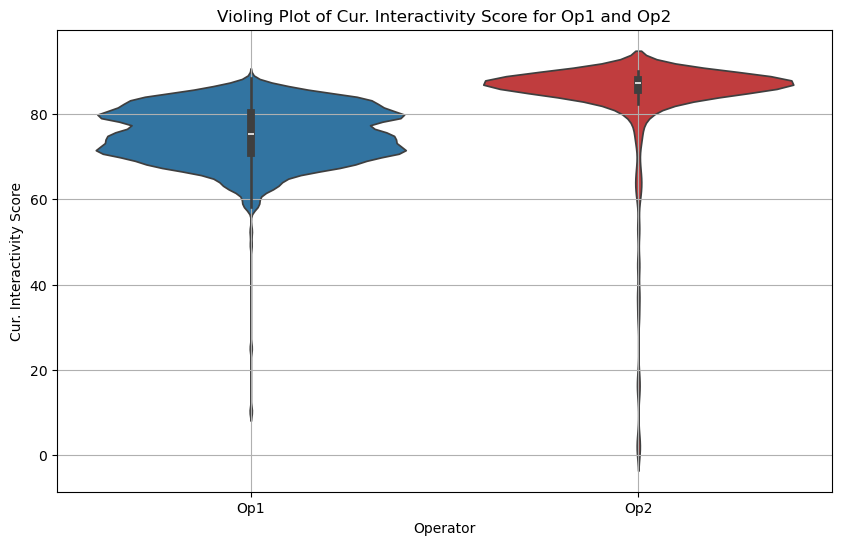

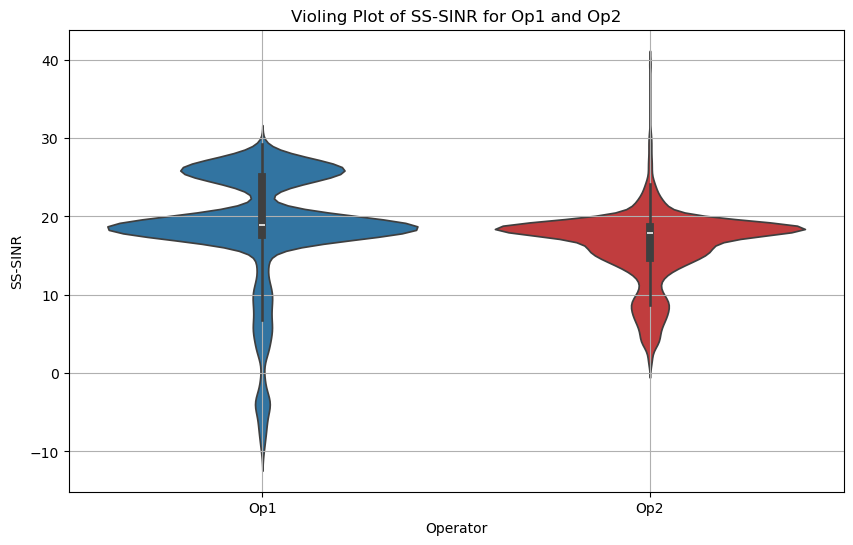

In [766]:
custom_palette = {'Op1': "#1f77b4", 'Op2': "#d62728"}

def plot_violin(metric, data):
    unique_campaigns = data['Campaign'].unique()
    
    if len(unique_campaigns) == 2:
        campaign_names = ' and '.join(unique_campaigns)
    else:
        campaign_names = ', '.join(unique_campaigns)
        
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Operator', y=metric, hue='Operator', data=data, palette=custom_palette)
    plt.title(f'Violing Plot of {metric} for Op1 and Op2')
    plt.xlabel('Operator')
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()

latency = 'Cur. Interactivity Score'
SINR = 'SS-SINR'
#combined_data_15_10 = pd.concat([campaign_15, campaign_10])
#combined_data_14_7 = pd.concat([campaign_14, campaign_7])
#combined_data_16_9 = pd.concat([campaign_16, campaign_9])
#combined_data_33_27 = pd.concat([campaign_33, campaign_27])
# combining campaigns based on operators
operator_1 = pd.concat([campaign_14, campaign_15, campaign_16, campaign_21, campaign_33])
operator_2 = pd.concat([campaign_7, campaign_9, campaign_27])
combined_data = pd.concat([operator_1, operator_2])

print(f'Amount of rows with Op1: {len(combined_data[combined_data['Operator'] == 'Op1'])}')
print(f'Amount of rows with Op2: {len(combined_data[combined_data['Operator'] == 'Op2'])}')

plot_violin(latency, combined_data)
plot_violin(SINR, combined_data)

#plot_violin(latency, combined_data_15_10)
#plot_violin(latency, combined_data_14_7)
#plot_violin(latency, combined_data_16_9)
#plot_violin(latency, combined_data_33_27)
